# Módulo 2 - Parte 2 - Pandas


In [ ]:
# importando as bibliotecas
import pandas as pd

In [ ]:
pd.read_csv?

In [ ]:
# leitura dos dados csv
df = pd.read_csv("https://pycourse.s3.amazonaws.com/temperature.csv")
df

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [ ]:
# leitura de planilhas excel
# 2 abas (worksheets)

# leitura do arquivo todo
excel_file = pd.ExcelFile("https://pycourse.s3.amazonaws.com/temperature.xlsx")

In [ ]:
type(excel_file)

pandas.io.excel._base.ExcelFile

In [ ]:
# leitura da primeira aba (Sheet1)
# dados numéricos com separador decimal = '.'
df2 = pd.read_excel(excel_file, sheet_name='Sheet1') #excel_file é o caminho #sheet_name é a aba que quer trabalhar
df2

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [ ]:
# leitura da segunda aba (Sheet2)
# dados numéricos com separador decimal = ','
df3 = pd.read_excel(excel_file, sheet_name='Sheet2') 
df3['temperatura'] = df3['temperatura'].str.replace(',', '.').astype('float') #trocar o separador numerico de virgula para ponto para poder trabalhar
df3

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [ ]:
# visualizando as primeiras n linhas
n = 3
df.head(n)

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente


In [ ]:
# visualizando as últimas n linhas
n = 3
df.tail(n)

,date,temperatura,classification
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [ ]:
# dtypes
df.dtypes

date               object
temperatura       float64
classification     object
dtype: object

In [ ]:
# estatísticas básicas
df.describe()

,temperatura
count,6.000000
mean,26.800000
std,4.075782
min,20.000000
25%,25.000000
50%,28.250000
75%,28.950000
max,31.200000


In [ ]:
# dataframe info
df.info()

#data devemos mudar de objeto para datetime, mais abaixo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            6 non-null      object 
 1   temperatura     6 non-null      float64
 2   classification  6 non-null      object 
dtypes: float64(1), object(2)
memory usage: 272.0+ bytes


In [ ]:
# nomes das colunas
df.columns

Index(['date', 'temperatura', 'classification'], dtype='object')

In [ ]:
# renomeando as colunas #lembrando q todas devem ser inseridas tudo novamente, mesmo q queria alterar apenas uma
#df.columns = ['col1', 'col2', 'col3']
#df

## Indexação

In [ ]:
df.head()

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel


In [ ]:
# seleção de uma coluna
df['temperatura']

0    29.1
1    31.2
2    28.5
3    28.0
4    24.0
5    20.0
Name: temperatura, dtype: float64

In [ ]:
# tipo
type(df['temperatura'])

pandas.core.series.Series

In [ ]:
# seleção de múltiplas colunas
df[['date', 'classification', 'temperatura']]

,date,classification,temperatura
0,2020-01-01,quente,29.1
1,2020-02-01,muito quente,31.2
2,2020-03-01,quente,28.5
3,2020-04-01,quente,28.0
4,2020-05-01,confortavel,24.0
5,2020-06-01,frio,20.0


In [ ]:
# tipo
type(df[['date', 'classification']])

pandas.core.frame.DataFrame

In [ ]:
# iloc
df.iloc?

In [ ]:
# indexação por índice
# selecionado todas as linhas e a coluna 1
# coluna 1: temperatura
#df.iloc[:, 1] #coluna 1 é a temperatura
a = df.iloc[:, 1]

In [ ]:
# indexação por nome
# selecionado todas as linhas e a coluna 1
df.loc[:, 'temperatura']

0    29.1
1    31.2
2    28.5
3    28.0
4    24.0
5    20.0
Name: temperatura, dtype: float64

In [ ]:
# indexação por índice de múltiplas colunas
df.iloc[:, 1:]

,temperatura,classification
0,29.1,quente
1,31.2,muito quente
2,28.5,quente
3,28.0,quente
4,24.0,confortavel
5,20.0,frio


In [ ]:
# indexação por nome de múltiplas colunas
df.loc[:, ['temperatura', 'classification']]

,temperatura,classification
0,29.1,quente
1,31.2,muito quente
2,28.5,quente
3,28.0,quente
4,24.0,confortavel
5,20.0,frio


In [ ]:
# indexação por nome de múltiplas colunas
df.loc[:, 'temperatura':]

,temperatura,classification
0,29.1,quente
1,31.2,muito quente
2,28.5,quente
3,28.0,quente
4,24.0,confortavel
5,20.0,frio


### **Indexação booleana**

In [ ]:
df

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [ ]:
# dtype
df.dtypes

date               object
temperatura       float64
classification     object
dtype: object

In [ ]:
# transformando o tipo da coluna date para datetime
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date              datetime64[ns]
temperatura              float64
classification            object
dtype: object

In [ ]:
# setando o índice
df = df.set_index('date')

In [ ]:
# visualizando o índice 
df

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [ ]:
# 5 primeiras linas
df.head()

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel


In [ ]:
# indexação booleana
# seleção de exemplos acima de 25 graus
cond = df['temperatura'] >= 25
df[cond]

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente


In [ ]:
# indexação booleana considerando datetime
# seleção de entradas até Março de 2020
cond = df.index <= '2020-03-01'
df[cond]

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente


In [ ]:
# indexação booleana considerando datetime
# seleção de entradas até Março de 2020 e 
# slice na coluna classification
df.loc[df.index <= '2020-03-01', ['classification']]

,classification
date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente


In [ ]:
# indexação booleana considerando datetime
# seleção de entradas até Março de 2020 e 
# slice na coluna classification
df.iloc[df.index <= '2020-03-01', [-1]]

,classification
date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente


### **Ordenação**

In [ ]:
# df.sort_values
df

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [ ]:
# ordenação crescente por uma coluna
df.sort_values(by='temperatura')

,temperatura,classification
date,,
2020-06-01,20.0,frio
2020-05-01,24.0,confortavel
2020-04-01,28.0,quente
2020-03-01,28.5,quente
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente


In [ ]:
# ordenação crescente por uma coluna
df.sort_values(by='classification')

,temperatura,classification
date,,
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio
2020-02-01,31.2,muito quente
2020-01-01,29.1,quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente


In [ ]:
# ordenação crescente por mais de uma coluna
df.sort_values(by=['classification', 'temperatura'])

,temperatura,classification
date,,
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio
2020-02-01,31.2,muito quente
2020-04-01,28.0,quente
2020-03-01,28.5,quente
2020-01-01,29.1,quente


In [ ]:
# ordenação decrescente por uma coluna
df.sort_values(by=['classification', 'temperatura'], ascending=False)

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-02-01,31.2,muito quente
2020-06-01,20.0,frio
2020-05-01,24.0,confortavel


In [ ]:
# ordenação crescente pelo índice
df.sort_index()

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [ ]:
# ordenação decrescente pelo índice
df.sort_index(ascending=False)

,temperatura,classification
date,,
2020-06-01,20.0,frio
2020-05-01,24.0,confortavel
2020-04-01,28.0,quente
2020-03-01,28.5,quente
2020-02-01,31.2,muito quente
2020-01-01,29.1,quente


### **Visualização**

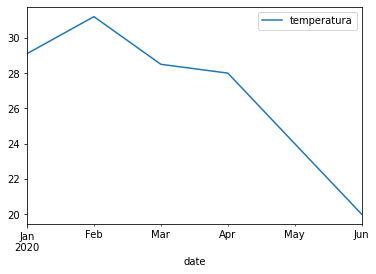

In [ ]:
# plot de linhas
df.plot(); # o date é o index do DataFrame
#index é o eixo x
# com ;  some as infos

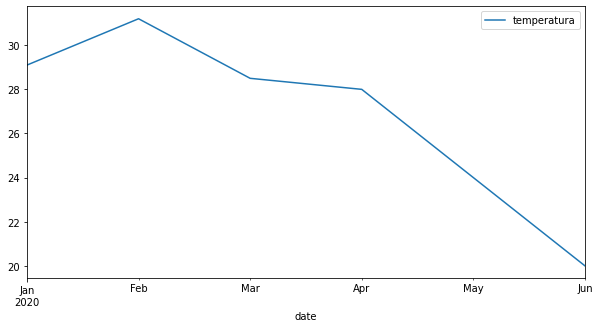

In [ ]:
# plot de linhas: tamanho
df.plot(figsize=(10, 5));

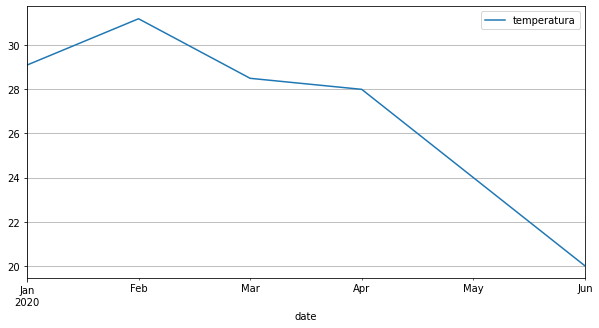

In [ ]:
# plot de linhas: grid
df.plot(figsize=(10, 5), grid=True);

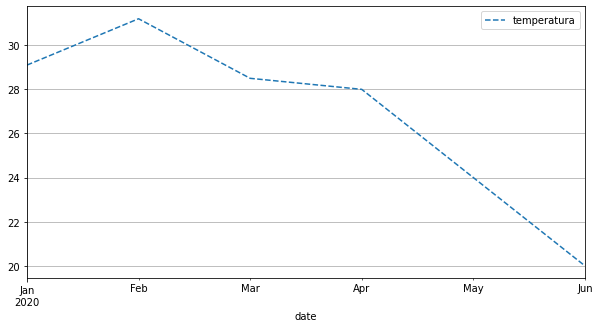

In [ ]:
# plot de linhas: style
#df.plot(style='-o', figsize=(10, 5), grid=True);
df.plot(style='--', figsize=(10, 5), grid=True);
#df.plot(style='-.', figsize=(10, 5), grid=True);

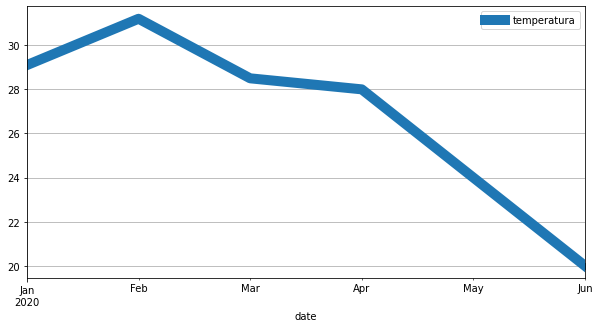

In [ ]:
# plot de linhas: linewidth
df.plot(style='-o', linewidth=10, figsize=(10, 5), grid=True);

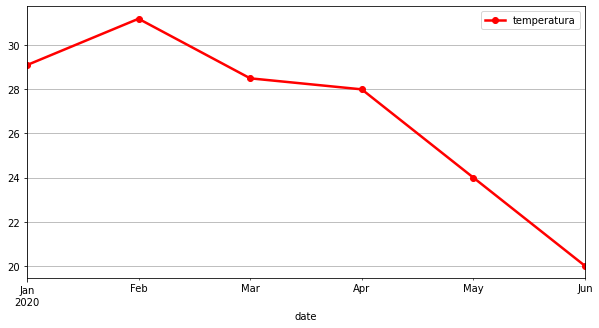

In [ ]:
# plot de linhas: color
df.plot(style='-o', linewidth=2.5, color='red', figsize=(10, 5), grid=True);

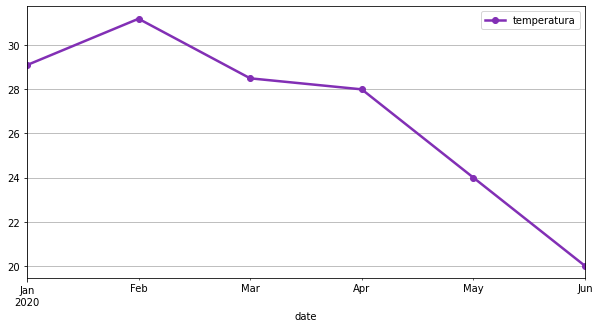

In [ ]:
# plot de linhas: color
df.plot(style='-o', linewidth=2.5, color='#822fb5', figsize=(10, 5), grid=True);

In [ ]:
df

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [ ]:
df['classification'].value_counts()

quente          3
muito quente    1
confortavel     1
frio            1
Name: classification, dtype: int64

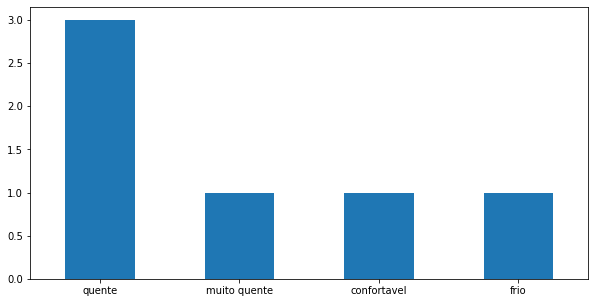

In [ ]:
# plot de barras
df['classification'].value_counts().plot.bar(figsize=(10, 5),
                                             rot=0);

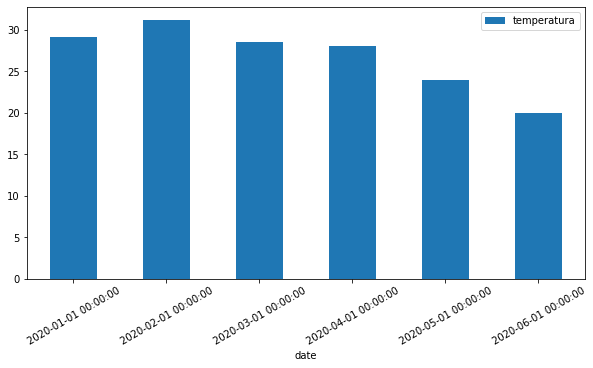

In [ ]:
# plot de barras
df.plot(kind='bar', figsize=(10, 5), rot=30);

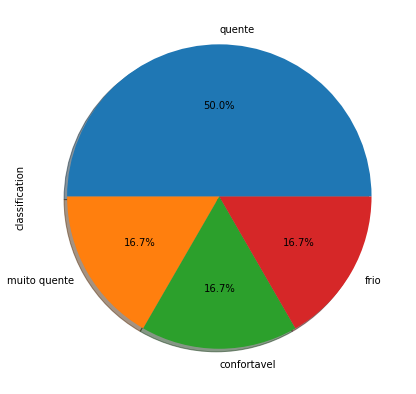

In [ ]:
# pie plot
df['classification'].value_counts().plot.pie(autopct='%1.1f%%',
                                             shadow=True,
                                             figsize=(10, 7));
                                             #autopct coloca %

### **Outras operações úteis no pandas**

In [ ]:
# dataframe
df.head(6)

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [ ]:
# groupby: agrupamento por valores únicos de uma ou mais colunas
df.groupby(by='classification')

In [ ]:
# groupby: agrupamento por valores únicos de uma ou mais colunas
df.groupby(by='classification').mean()

,temperatura
classification,
confortavel,24.000000
frio,20.000000
muito quente,31.200000
quente,28.533333


In [ ]:
# groupby: agrupamento por valores únicos de uma ou mais colunas
df.groupby(by='classification').sum()

,temperatura
classification,
confortavel,24.0
frio,20.0
muito quente,31.2
quente,85.6


In [ ]:
# drop: remoção de uma coluna
df.drop('temperatura', axis=1)

,classification
date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente
2020-04-01,quente
2020-05-01,confortavel
2020-06-01,frio


In [ ]:
df# cópia de um dataframe: evita compartilhamento de memória
# sem copy(), operações inplace em df2 também alteram df
# df2 = df.copy() 
df2 = df

In [ ]:
# argumento inplace
# inplace=True aplica a transformação no próprio objeto
df3 = df2.drop("temperatura", axis=1)

In [ ]:
# sem inplace, df2 continua o mesmo
df3.head()

,classification
date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente
2020-04-01,quente
2020-05-01,confortavel


In [ ]:
# argumento inplace
# inplace=True aplica a transformação no próprio objeto
df2.drop("temperatura", axis=1, inplace=True)

In [ ]:
# com inplace, df2 é alterado
df2.head()

,classification
date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente
2020-04-01,quente
2020-05-01,confortavel


In [ ]:
# df
df.head()

,classification
date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente
2020-04-01,quente
2020-05-01,confortavel


## **Scikit-learn**

### **Classificação no scikit-learn**

In [ ]:
# leitura dos dados csv
df = pd.read_csv("https://pycourse.s3.amazonaws.com/temperature.csv")
df = df.set_index('date')
df

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [ ]:
# extração de x e y
x, y = df[['temperatura']].values, df[['classification']].values
print("x:\n", x)
print("y:\n", y)

x:
 [[29.1]
 [31.2]
 [28.5]
 [28. ]
 [24. ]
 [20. ]]
y:
 [['quente']
 ['muito quente']
 ['quente']
 ['quente']
 ['confortavel']
 ['frio']]


In [ ]:
# pré-processamento
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

In [ ]:
LabelEncoder?

In [ ]:
# conversão de y para valores numéricos
le = LabelEncoder()  # label enconder
y = le.fit_transform(y.ravel()) #fit é o metodo pega o array de input, calcula e absorve os parametros. e o transform aplica a transformação

print("y:\n", y)

y:
 [3 2 3 3 0 1]


In [ ]:
# modelo
from sklearn.linear_model import LogisticRegression
import numpy as np

In [ ]:
# classificador
clf = LogisticRegression()
clf.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# gerando 100 valores de temperatura
# linearmente espaçados entre 0 e 45
# predição em novos valores de temperatura
x_test = np.linspace(start=0., stop=45., num=100).reshape(-1, 1) #vetor coluna

# predição desses valores
y_pred = clf.predict(x_test)

In [ ]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
# conversão de y_pred para os valores originais
y_pred = le.inverse_transform(y_pred)
print(y_pred)

['frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'confortavel' 'confortavel' 'confortavel' 'confortavel' 'confortavel'
 'confortavel' 'quente' 'quente' 'quente' 'quente' 'quente' 'quente'
 'quente' 'quente' 'quente' 'quente' 'quente' 'quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito quente' 'muito quente' 'muito quente' 'muito quente'
 'muito 

In [ ]:
print(x_test)

[[ 0.        ]
 [ 0.45454545]
 [ 0.90909091]
 [ 1.36363636]
 [ 1.81818182]
 [ 2.27272727]
 [ 2.72727273]
 [ 3.18181818]
 [ 3.63636364]
 [ 4.09090909]
 [ 4.54545455]
 [ 5.        ]
 [ 5.45454545]
 [ 5.90909091]
 [ 6.36363636]
 [ 6.81818182]
 [ 7.27272727]
 [ 7.72727273]
 [ 8.18181818]
 [ 8.63636364]
 [ 9.09090909]
 [ 9.54545455]
 [10.        ]
 [10.45454545]
 [10.90909091]
 [11.36363636]
 [11.81818182]
 [12.27272727]
 [12.72727273]
 [13.18181818]
 [13.63636364]
 [14.09090909]
 [14.54545455]
 [15.        ]
 [15.45454545]
 [15.90909091]
 [16.36363636]
 [16.81818182]
 [17.27272727]
 [17.72727273]
 [18.18181818]
 [18.63636364]
 [19.09090909]
 [19.54545455]
 [20.        ]
 [20.45454545]
 [20.90909091]
 [21.36363636]
 [21.81818182]
 [22.27272727]
 [22.72727273]
 [23.18181818]
 [23.63636364]
 [24.09090909]
 [24.54545455]
 [25.        ]
 [25.45454545]
 [25.90909091]
 [26.36363636]
 [26.81818182]
 [27.27272727]
 [27.72727273]
 [28.18181818]
 [28.63636364]
 [29.09090909]
 [29.54545455]
 [30.     

In [ ]:
# output
output = {'new_temp': x_test.ravel(),
         'new_class': y_pred.ravel()}
output = pd.DataFrame(output)

In [ ]:
output.head(5)

,new_temp,new_class
0,0.000000,frio
1,0.454545,frio
2,0.909091,frio
3,1.363636,frio
4,1.818182,frio


In [ ]:
output.tail()

,new_temp,new_class
95,43.181818,muito quente
96,43.636364,muito quente
97,44.090909,muito quente
98,44.545455,muito quente
99,45.000000,muito quente


In [ ]:
# estatisticas
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   new_temp   100 non-null    float64
 1   new_class  100 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
# estatisticas
output.describe()

,new_temp
count,100.000000
mean,22.500000
std,13.187042
min,0.000000
25%,11.250000
50%,22.500000
75%,33.750000
max,45.000000


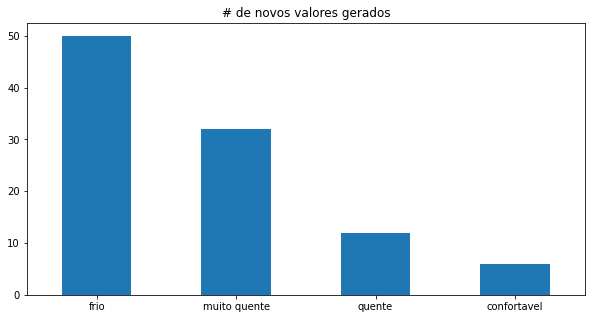

In [ ]:
# contagem de valores gerados
output['new_class'].value_counts().plot.bar(figsize=(10, 5),
                                            rot=0,
                                            title="# de novos valores gerados");

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


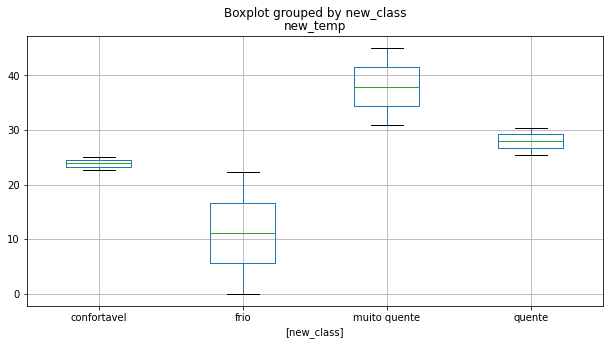

In [ ]:
# distribuição do output produzido
# conseguimos inferir a classificação novas temperaturas
# a partir de um dataset com 6 exemplos
output.boxplot(by='new_class', figsize=(10, 5));

In [ ]:
# sistema automático
def classify_temp():
  """Classifica o input do usuário."""

  ask = True
  while ask:
    # input de temperatura
    temp = input("Insira a temperatura (graus Celsius): ")

    # transformar para numpy array
    temp = np.array(float(temp)).reshape(-1, 1)
    
    # realiza classificação
    class_temp = clf.predict(temp)

    # transformação inversa para retornar a string original
    class_temp =  le.inverse_transform(class_temp)

    # classificação
    print(f"A classificação da temperatura {temp.ravel()[0]} é:", class_temp[0])

    # perguntar
    ask = input("Nova classificação (y/n): ") == 'y'

In [ ]:
# rodando programa 
classify_temp()

Insira a temperatura (graus Celsius): 30
A classificação da temperatura 30.0 é: quente
Nova classificação (y/n): n


### **Regressão linear no scikit-learn - I**

In [ ]:
# dados do segundo capítulo
x = [-1., -0.77777778, -0.55555556, -0.33333333, -0.11111111,
     0.11111111, 0.33333333, 0.55555556, 0.77777778, 1.]
y = [-1.13956201, -0.57177999, -0.21697033, 0.5425699, 0.49406657,
     1.14972239, 1.64228553, 2.1749824, 2.64773614, 2.95684202]

In [ ]:
import matplotlib.pyplot as plt

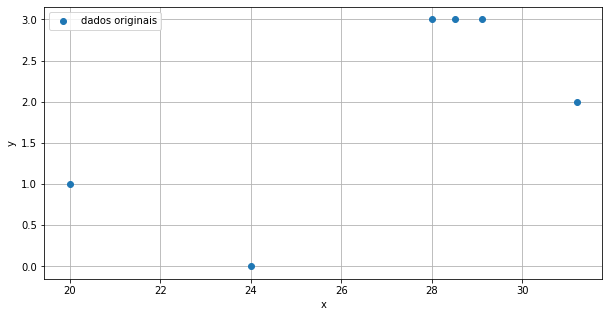

In [ ]:
# plot dos dados
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='dados originais')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [ ]:
# transformando em numpy array
x, y = np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1)

In [ ]:
# modelo
from sklearn.linear_model import LinearRegression

In [ ]:
# treinando o modelo: y = a*x + b, valores reais (a, b) = (2, 1)
reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# coeficientes a, b estimados:
# valores estimados usando o numpy diretamente
# a estimado no numpy: 2.05414951
# b estimado no numpy: 0.96798926
print("a estimado:", reg.coef_.ravel()[0])
print("b estimado:", reg.intercept_[0])

a estimado: 0.21189501565133645
b estimado: -3.6787864194558173


In [ ]:
# predição do modelo
y_pred = reg.predict(x)

In [ ]:
# score do modelo
score = reg.score(x, y)
print("score:", score)

score: 0.46616903443294


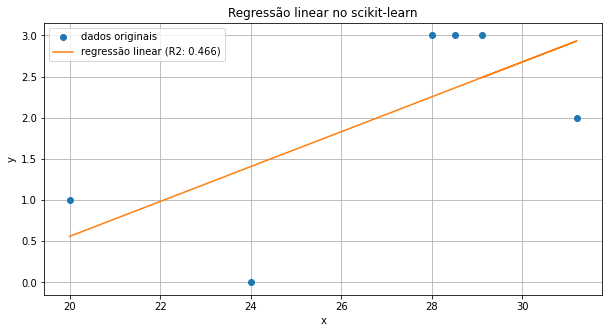

In [ ]:
# plot dos dados
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='dados originais')
plt.plot(x, y_pred, label='regressão linear (R2: {:.3f})'.format(score))
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressão linear no scikit-learn")
plt.grid()
plt.show()

### **Regressão linear no scikit-learn - II**


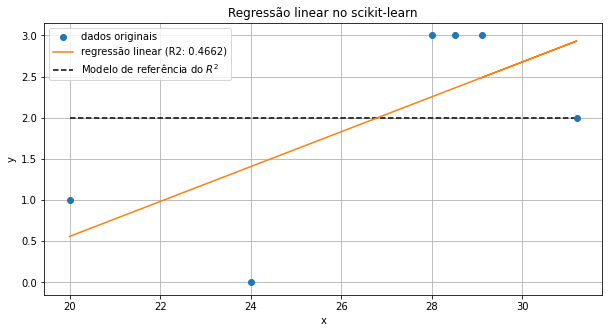

In [ ]:
# plot dos dados
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='dados originais')
plt.plot(x, y_pred, label='regressão linear (R2: {:.4f})'.format(score))
plt.hlines(y=y.mean(), xmin=x.min(), xmax=x.max(), linestyle='dashed',
           label='Modelo de referência do $R^2$')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regressão linear no scikit-learn")
plt.grid()
plt.show()

O erro quadrático médio de um modelo de regressão é dado por:

$$MSE_{reg} = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2.$$

O coeficiente de determinação $R^2$ representa o quão melhor um modelo é em relação a um modelo de referência que prevê sempre a média dos pontos, ou seja, o MSE do modelo de referência é dado por:

$$MSE_{ref} = \frac{1}{n}\sum_{i=1}^{n} (y_i - \bar{y})^2,$$

onde $\bar{y}$ representa a média do vetor $y$.

Sendo assim:

$$R^2 = 1 - \frac{MSE_{reg}}{MSE_{ref}}$$

In [ ]:
# função para cálculo do MSE
def mse(y_true, y_pred, is_ref = False):

  # mse modelo
  if is_ref:
    mse = ((y_true - y_true.mean())**2).mean()
  else:
    mse = ((y_true - y_pred)**2).mean()

  return mse

In [ ]:
# função para cálculo do coeficiente de determinação R2
def r2(mse_reg, mse_ref):
  return 1 - mse_reg/mse_ref

In [ ]:
# visualizando y e y_pred
print("y_true:", y.ravel())
print("y_pred:", y_pred.ravel())

y_true: [3 2 3 3 0 1]
y_pred: [2.48735854 2.93233807 2.36022153 2.25427402 1.40669396 0.55911389]


In [ ]:
# calculando o mse dos modelos
mse_reg = mse(y_true=y, y_pred=y_pred)
print("MSE do modelo de regressão:", mse_reg)
mse_ref = mse(y_true=y, y_pred=y_pred, is_ref=True)
print("MSE do modelo de referência:", mse_ref)

MSE do modelo de regressão: 0.71177462075608
MSE do modelo de referência: 1.3333333333333333


In [ ]:
# calculando o R2 score
r2_score = r2(mse_reg=mse_reg, mse_ref=mse_ref)
print("Coeficiente R2 do modelo implementado (calculado):", r2_score)

Coeficiente R2 do modelo implementado (calculado): 0.46616903443294


In [ ]:
# score retornado pelo scikit-learn
r2_score_skl = reg.score(x, y)
print("Coeficiente R2 do modelo implementado (scikit-learn):", r2_score_skl)

Coeficiente R2 do modelo implementado (scikit-learn): 0.46616903443294
